In [284]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import*
from pymatgen.electronic_structure import bandstructure 
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Markdown
def printGras(string):
    display(Markdown(string))

with MPRester("inU5O5NjJKENIfaZf6EO") as m:
    bandStruct = m.get_bandstructure_by_material_id("mp-20289") #Téléchargement de l'objet Band Structure
    

In [ ]:
printGras("**Diagramme de la structure de bande**")

bandPlot=BSPlotter(bandStruct)
bandPlot.show()

In [297]:
printGras("***La bande interdite***")
bandGap=bandStruct.get_band_gap()
print("• Energie de la bande interdite:", bandGap["energy"], "[eV]")
if bandGap["direct"]==False:
    print("• La bande interdite est indirecte")
else:
    print("• La bande interdite est directe")
print("• Type de transition de la bande:", bandGap["transition"])
print('• Energie de Fermi : ', bandStruct.efermi,"[eV]\n")
print("L'énergie nécessaire pour franchir la bande interdite est de", bandGap.get("energy"), "[eV], ce matériau peut donc être utilisé comme semi-conducteur.")
print("La bande est indirecte car le maximum de la bande de valence (vbm) n’est pas associé au même vecteur d’onde que le minimum de la bande de conduction (cbm).")

***La bande interdite***

• Energie de la bande interdite: 1.9000999999999997 [eV]
• La bande interdite est indirecte
• Type de transition de la bande: (0.125,0.000,-0.000)-F
• Energie de Fermi :  3.4960842 [eV]

L'énergie nécessaire pour franchir la bande interdite est de 1.9000999999999997 [eV], ce matériau peut donc être utilisé comme semi-conducteur.
La bande est indirecte car le maximum de la bande de valence (vbm) n’est pas associé au même vecteur d’onde que le minimum de la bande de conduction (cbm).


In [298]:
printGras("***Recherche des directions où les dispersions sont maximales ou minimales***")
print("-----------------------------")
#1.Calculer les pentes pour chaque branche
#2.La dispersion est maximale (minimale) dans la branche où la pente est maximale (minimale) et suit la direction de cette pente

printGras("**1. Analyse de la dernière bande de valence**")

#Données sur la bande
data = bandPlot.bs_plot_data()
energy = data.get('energy')
distance = data.get("ticks").get("distance")
branche = ticks.get('distance')

#dernière bande de valence
print("La dernière bande de valence est :", energy[0].get('1')[15],"\n")
#première bande de conduction
print("La première bande de conduction est :", energy[0].get('1')[16])
print("\n")
print(vbm.get('band_index'))
print("La première bande de conduction est la première juste au dessus de", bandGap["energy"] , "eV.")
print(cbm.get('band_index'))
print("La dernière bande de valence est donc juste celle en dessous.")

***Recherche des directions où les dispersions sont maximales ou minimales***

-----------------------------


**1. Analyse de la dernière bande de valence**

La dernière bande de valence est : [-0.056400000000000006, -0.04760000000000009, -0.029600000000000293, -0.013100000000000112, -0.0028999999999999027, 0.0, -0.0041999999999999815, -0.014600000000000168, -0.030100000000000016, -0.0495000000000001, -0.07140000000000013, -0.0947, -0.11840000000000028, -0.14150000000000018, -0.16320000000000023, -0.18270000000000008, -0.1995, -0.21300000000000008, -0.2229000000000001, -0.2290000000000001, -0.23099999999999987] 

La première bande de conduction est : [1.9586999999999999, 2.0067, 2.1384000000000003, 2.3264, 2.5429999999999997, 2.7646, 2.9697999999999998, 3.1354, 3.2379000000000002, 3.2640999999999996, 3.2228999999999997, 3.1386, 3.0340000000000003, 2.9248, 2.8207, 2.7273, 2.6479000000000004, 2.5848, 2.539, 2.5113, 2.5020000000000002]


defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
La première bande de conduction est la première juste au dessus de 1.9000999999999997 eV.
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La dernière bande d

In [299]:
#détermination des distances entre branches
dist = data.get("ticks").get("distance")
print(dist)
print("\n")
print("On remarque qu'il y a des redondances dans les distances, donc il ne faudra pas en tenir compte dans les calculs suivants.")
dist1 = dist[1]-dist[0]    #entre Gamma et L
dist2 = dist[3]-dist[1]    #entre L et B1|B
dist3 = dist[4]-dist[3]    #entre B1|B et Z
dist4 = dist[6]-dist[4]    #entre Z et Gamma
dist5 = dist[8]-dist[6]    #entre Gamma et X|Q
dist6 = dist[9]-dist[8]    #entre X|Q et F
dist7 = dist[11]-dist[9]   #entre F et P1
dist8 = dist[13]-dist[11]  #entre P1 et Z|L
dist9 = dist[14]-dist[13]  #entre Z|L et P

[0.0, 0.9531481215147507, 0.9531481215147507, 1.3710657296924296, 2.0821815868765206, 2.0821815868765206, 3.0353297975181994, 3.0353297975181994, 3.808805334287925, 4.321677394007801, 4.321677394007801, 4.627159066893445, 4.627159066893445, 5.119752218182992, 5.750268142682577]


On remarque qu'il y a des redondances dans les distances, donc il ne faudra pas en tenir compte dans les calculs suivants.


In [300]:
#calcul des différences d'énergies

#entre Gamma et L
EC1=(data.get('energy')[0].get('1')[16])[len((data.get('energy')[0].get('1')[16]))-1] - (data.get('energy')[0].get('1')[16])[0]
EV1=(data.get('energy')[0].get('1')[15])[len((data.get('energy')[0].get('1')[15]))-1] - (data.get('energy')[0].get('1')[15])[0]

#print(EC1)
#print(EV1)

#entre L et B1|B
EC2=(data.get('energy')[1].get('1')[16])[len((data.get('energy')[1].get('1')[16]))-1] - (data.get('energy')[1].get('1')[16])[0]
EV2=(data.get('energy')[1].get('1')[15])[len((data.get('energy')[1].get('1')[15]))-1] - (data.get('energy')[1].get('1')[15])[0]

#entre B1|B et Z
EC3=(data.get('energy')[2].get('1')[16])[len((data.get('energy')[2].get('1')[16]))-1] - (data.get('energy')[2].get('1')[16])[0]
EV3=(data.get('energy')[2].get('1')[15])[len((data.get('energy')[2].get('1')[15]))-1] - (data.get('energy')[2].get('1')[15])[0]


#entre Z et Gamma
EC4=(data.get('energy')[3].get('1')[16])[len((data.get('energy')[3].get('1')[16]))-1] - (data.get('energy')[3].get('1')[16])[0]
EV4=(data.get('energy')[3].get('1')[15])[len((data.get('energy')[3].get('1')[15]))-1] - (data.get('energy')[3].get('1')[15])[0]


#entre Gamma et X|Q
EC5=(data.get('energy')[4].get('1')[16])[len((data.get('energy')[4].get('1')[16]))-1] - (data.get('energy')[4].get('1')[16])[0]
EV5=(data.get('energy')[4].get('1')[15])[len((data.get('energy')[4].get('1')[15]))-1] - (data.get('energy')[4].get('1')[15])[0]


#entre X|Q et F
EC6=(data.get('energy')[5].get('1')[16])[len((data.get('energy')[5].get('1')[16]))-1] - (data.get('energy')[5].get('1')[16])[0]
EV6=(data.get('energy')[5].get('1')[15])[len((data.get('energy')[5].get('1')[15]))-1] - (data.get('energy')[5].get('1')[15])[0]


#entre F et P1
EC7=(data.get('energy')[6].get('1')[16])[len((data.get('energy')[6].get('1')[16]))-1] - (data.get('energy')[6].get('1')[16])[0]
EV7=(data.get('energy')[6].get('1')[15])[len((data.get('energy')[6].get('1')[15]))-1] - (data.get('energy')[6].get('1')[15])[0]

#entre P1 et Z|L
EC8=(data.get('energy')[7].get('1')[16])[len((data.get('energy')[7].get('1')[16]))-1] - (data.get('energy')[7].get('1')[16])[0]
EV8=(data.get('energy')[7].get('1')[15])[len((data.get('energy')[7].get('1')[15]))-1] - (data.get('energy')[7].get('1')[15])[0]

#entre Z|L et P
EC9=(data.get('energy')[8].get('1')[16])[len((data.get('energy')[8].get('1')[16]))-1] - (data.get('energy')[8].get('1')[16])[0]
EV9=(data.get('energy')[8].get('1')[15])[len((data.get('energy')[8].get('1')[15]))-1] - (data.get('energy')[8].get('1')[15])[0]

In [301]:

#calcul des pentes des deux bandes pour les 8

#entre Gamma et L
PC1=EC1/dist1
PV1=EV1/dist1

#print(PC1)
#print(PV1)

#entre L et B1|B
PC2=EC2/dist2
PV2=EV2/dist2

#entre B1|B et Z
PC3=EC3/dist3
PV3=EV3/dist3

#entre Z et Gamma
PC4=EC4/dist4
PV4=EV4/dist4

#entre Gamma et X|Q
PC5=EC5/dist5
PV5=EV5/dist5

#entre X|Q et F
PC6=EC6/dist6
PV6=EV6/dist6

#entre F et P1
PC7=EC7/dist7
PV7=EV7/dist7

#entre P1 et Z|L
PC8=EC8/dist8
PV8=EV8/dist8

#entre Z|L et P
PC9=EC9/dist9
PV9=EV9/dist9

PC=np.array([PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9])
PV=np.array([PV1, PV2, PV3, PV4, PV5, PV6, PV7, PV8, PV9])

print("pente conduction \n", PC)
print(PV)
print('\n')

MaxPC=-np.amax(abs(PC))
MinPC=np.amin(abs(PC))
MaxPV=np.amax(abs(PV))
MinPV=-np.amin(abs(PV))
print("Le maximum de dispersion de la bande de conduction est", MaxPC, "dans la direction X|Q-F")
print("Le minimum de dispersion de la bande de conduction est", MinPC, "dans la direction P1-Z|L ")
print("Le maximum de dispersion de la bande de valence est", MaxPV, "dans la direction X|Q-F")
print("Le minimum de dispersion de la bande de valence est", MinPV, "dans la direction Gamma-X|Q")

pente conduction 
 [ 0.57000584  1.04566066 -0.61438652 -0.57011071  0.75076712 -2.33937485
  1.84757401  0.07633074  0.43393036]
[-0.18318244 -0.87050651  0.51159034  0.18318242 -0.04706031  0.98211628
  0.19215555 -0.34978156 -0.14876706]


Le maximum de dispersion de la bande de conduction est -2.3393748543356327 dans la direction X|Q-F
Le minimum de dispersion de la bande de conduction est 0.07633074049358636 dans la direction P1-Z|L 
Le maximum de dispersion de la bande de valence est 0.9821162811542409 dans la direction X|Q-F
Le minimum de dispersion de la bande de valence est -0.04706031189042864 dans la direction Gamma-X|Q


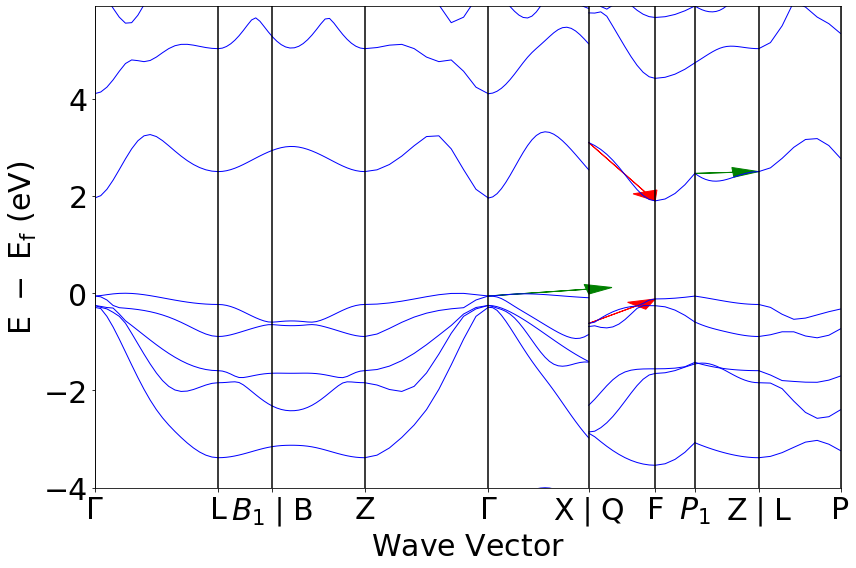

In [318]:
#flèches représentant les dispersions max et min des bandes de valence et de conduction
o = bandPlot.get_plot()
maxpc=plt.arrow((dist)[5+3], (data.get('energy')[5].get('1')[16])[0], dist6, EC6, head_width=0.2, head_length=0.2, fc='red', ec='red',length_includes_head=True)
minpc=plt.arrow((dist)[8+3], (data.get('energy')[7].get('1')[16])[0], dist8, EC8, head_width=0.2, head_length=0.2, fc='green', ec='green',length_includes_head=True)

maxpv=plt.arrow((dist)[5+3], (data.get('energy')[5].get('1')[15])[0], dist6, EV6, head_width=0.2, head_length=0.2, fc='red', ec='red',length_includes_head=True)
minpv=plt.arrow((dist)[4+3], (data.get('energy')[4].get('1')[15])[0], dist4, EV4, head_width=0.2, head_length=0.2, fc='green', ec='green',length_includes_head=True)

In [316]:
#Energie du point 0 où E=Ef
E0=data.get('zero_energy') 

#Analyse de la dernière bande de valence 

#Déterminer le vbm
vbm = bandStruct.get_vbm()
EVbm = vbm["energy"]
print(" • La dispersion maximale dans la bande de valence (vbm):")
print("Energie du maximum de la bande de valence = ",EVbm,"[eV]\n")
print(" • La dispersion minimale dans la bande de valence (vbm):")
#print(vbm.get('band_index'))
#print(energy[1].get('1')[11][0] + E0)

printGras("**2. Analyse de la première bande de conduction**")
cbm = bandStruct.get_cbm()
ECbm = cbm["energy"]
print(" • La dispersion maximale dans la bande de valence (vbm):")
print("Energie du maximum de la bande de valence = ", 0 ,"[eV]\n")
print(" • La dispersion minimale dans la bande de valence (vbm):")
print("Energie du minimum de la bande de valence = ", ECbm,"[eV]\n")

#branche1 = energy[0]
#print(branche1)
print("\n")
#print(branche1.get('1')[0])
#branche8 = energy[7]
#print(energy[8].get('1')[0])
#Schéma des directions 
#bandPlot.get_plot()

 • La dispersion maximale dans la bande de valence (vbm):
Energie du maximum de la bande de valence =  3.4449 [eV]

 • La dispersion minimale dans la bande de valence (vbm):


**2. Analyse de la première bande de conduction**

 • La dispersion maximale dans la bande de valence (vbm):
Energie du maximum de la bande de valence =  0 [eV]

 • La dispersion minimale dans la bande de valence (vbm):
Energie du minimum de la bande de valence =  5.345 [eV]





In [221]:
#détermination de la dernière bande de valence et de la première bande de conduction


In [215]:
printGras("***La masse effective***")
print("En supposant une dispersion parabolique, la formule pour déterminer la masse effective est  m* = (ħ²k²)/2E(k)")
print()
hBar = 6.582119569e-16 # en eVs  
EVbm = vbm["energy"]
ECbm = cbm["energy"]
kVbm = vbm["kpoint"].cart_coords
kCbm = cbm["kpoint"].cart_coords
mEffVbm = ((hBar**2)*(kVbm[0]**2+kVbm[1]**2+kVbm[2]**2))/(2*EVbm)
mEffCbm = ((hBar**2)*(kCbm[0]**2+kCbm[1]**2+kCbm[2]**2))/(2*ECbm)
print("• La masse effective au sommet de la dernière bande de valence vaut m* =", mEffVbm, "[kg] \n")
print("• La masse effective à la base de la première bande de conduction vaut m* =", mEffCbm, "[kg] \n")


**La masse effective**

En supposant une dispersion parabolique, la formule pour déterminer la masse effective est  m* = (ħ²k²)/2E(k)

• La masse effective au sommet de la dernière bande de valence vaut m* = 3.570472803123165e-33 [kg] 

• La masse effective à la base de la première bande de conduction vaut m* = 3.978769931044132e-32 [kg] 

